In [13]:
import excursion
import excursion.testcases.fast as scandetails
import excursion.optimize
import numpy as np
import logging
np.warnings.filterwarnings('ignore')

scandetails.truth_functions = [
    scandetails.truth,
]

Try playing with the editing number of initializers, iterations or the batch size

Populating the interactive namespace from numpy and matplotlib


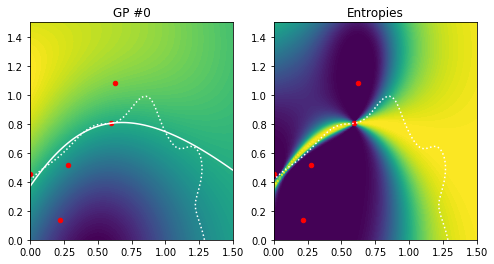

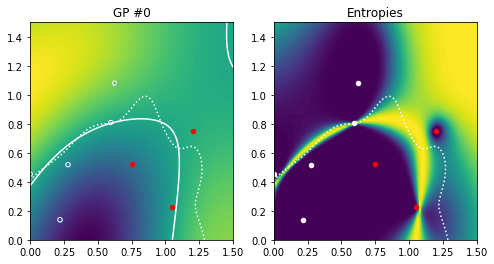

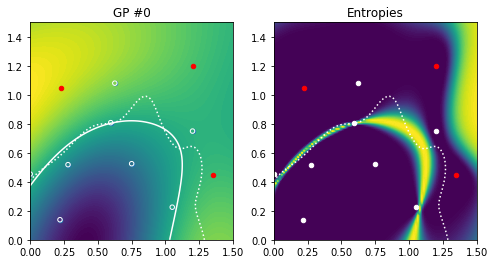

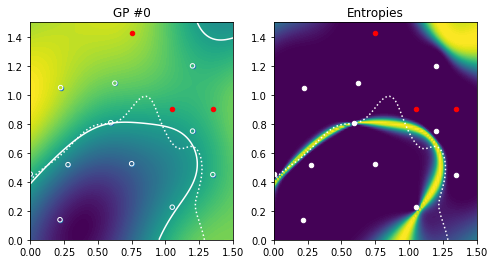

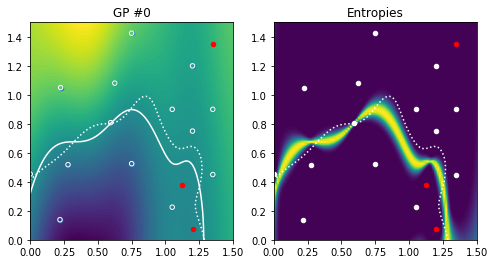

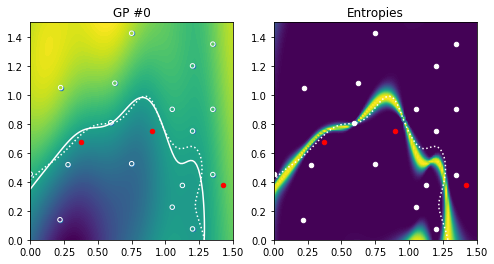

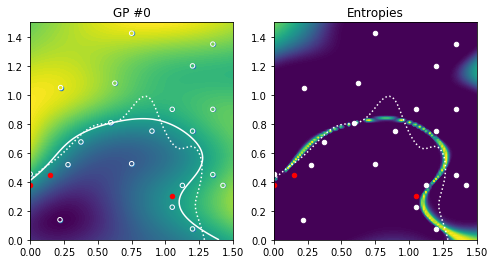

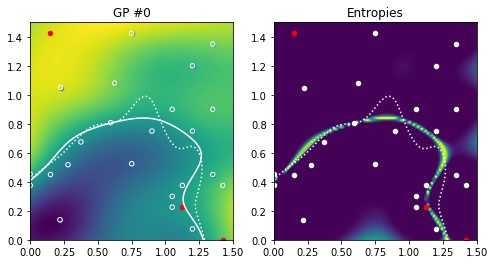

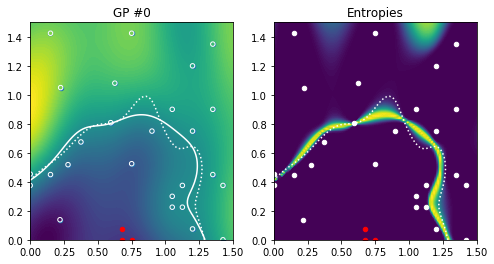

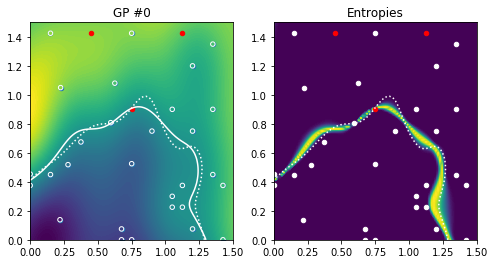

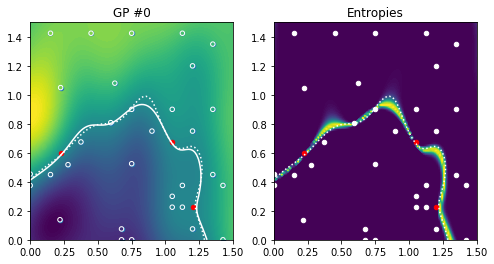

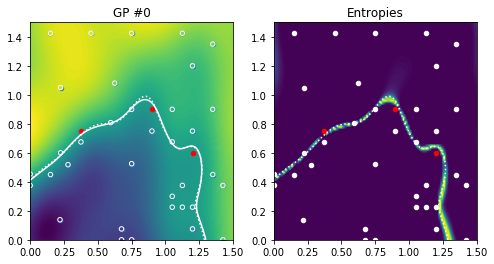

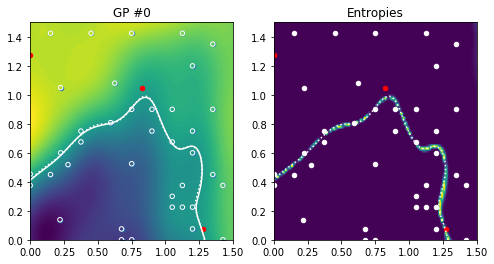

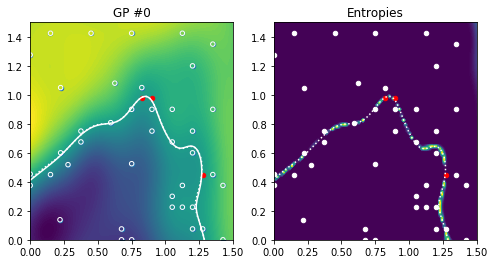

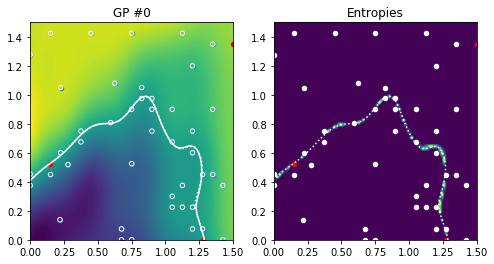

In [ ]:
N_INIT    = 5
N_ITER    = 15
N_BATCH   = 3

X,y_list, gps = excursion.optimize.init(scandetails, n_init = N_INIT, seed = 1)


%pylab inline
def plot(*args,**kwargs):
    import excursion.plotting.twodim as plots
    f,axarr = plt.subplots(1,2)
    f.set_size_inches(8,4)
    plots.plot(axarr, *args,**kwargs)
    plt.show()

index = 0
plot(gps, X, y_list, scandetails, batchsize=N_INIT)
for index in range(1,N_ITER+1):
    newX, acqvals = excursion.optimize.gridsearch(gps, X, scandetails, batchsize=N_BATCH)

    newys_list = [func(np.asarray(newX)) for func in scandetails.truth_functions]
    for i,newys in enumerate(newys_list):
        y_list[i] = np.concatenate([y_list[i],newys])
    X = np.concatenate([X,newX])
    gps = [excursion.get_gp(X,y_list[i]) for i in range(len(scandetails.truth_functions))]
    plot(gps, X, y_list, scandetails, batchsize=N_BATCH)